# **Challenge 1**

## **Task 1.3 - Performing a Zeno-gate**

### Part (a):
Here, we try to find the optimal value of $\epsilon_{Z}$ for which we get a full rotation of the state about the Z-axis. Starting with the even cat qubit, we let the state evolve under the given Hamiltonian, $H_{Z}$ for varying times and plot the photon number parity to find the time-period of a full rotation.

In [101]:
## Task 1.3

import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

1. First, we tried to find $T_{Z}$  for high values of $\epsilon_{Z}$. High values give bad results with the states quickly decohering.

|██████████| 100.0% ◆ elapsed 5.82s ◆ remaining 0.00ms   
100%|██████████| 50/50 [00:10<00:00,  4.70it/s]


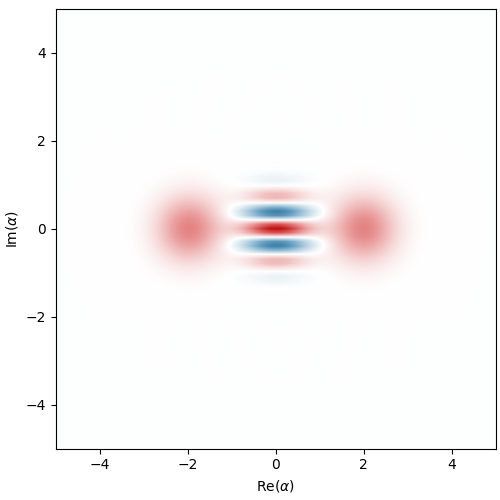

In [102]:
## High value of E_z

#Define parameters
g_z = 1.0
e_d = -4
kappa_b = 20
alpha = 2
T_z = 50

#Define Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

cat_even = dq.unit(dq.coherent(n_a, alpha) + dq.coherent(n_a, -alpha))
cat_odd = dq.unit(dq.coherent(n_a, alpha) - dq.coherent(n_a, -alpha))
a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))

#Define initial state
psi0 = dq.tensor(cat_even, dq.coherent(n_b, 0))

e_Z = -1
#Define Hamiltonian
H = g_z * (a.dag() @ a.dag() @ b + a @ a @ b.dag()) + e_d * (b + b.dag())
H_z = e_Z * (a.dag() + a)

#Define dissipators
L = [jnp.sqrt(kappa_b) * b]

#Time evolution parameters
ts = jnp.linspace(0, T_z, 100)

#Solve Master Equation
res = dq.mesolve((H+H_z), L, psi0, ts)
rho = dq.ptrace(res.states, 0)
#Plot Wigner function animation
dq.plot.wigner_gif(rho) # plot Wigner of cat state evolution

2. We find that low values of $\epsilon_{Z}$ give the desired rotation between states, from $\ket{+}$ to $\ket{-}$ in time $T_{Z}$ and back, as shown clearly by wigner gif below.

|██████████| 100.0% ◆ elapsed 5.96s ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:11<00:00,  4.37it/s]


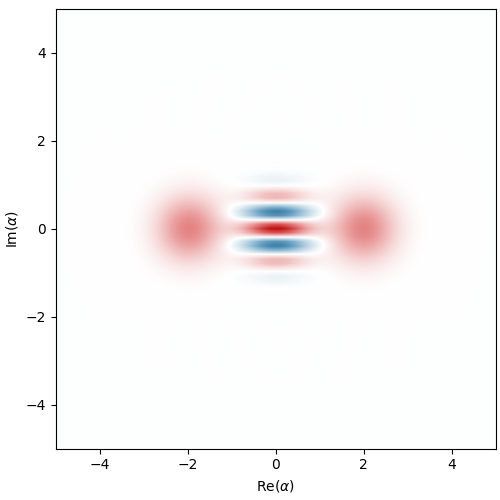

In [54]:
## Low value of E_z

e_Z = -0.05
#Define Hamiltonian
H = g_z * (a.dag() @ a.dag() @ b + a @ a @ b.dag()) + e_d * (b + b.dag())
H_z = e_Z * (a.dag() + a)

#Define dissipators
L = [jnp.sqrt(kappa_b) * b]

#Time evolution parameters
ts = jnp.linspace(0, T_z, 100)

#Solve Master Equation
res = dq.mesolve((H+H_z), L, psi0, ts)
rho = dq.ptrace(res.states, 0)
#Plot Wigner function animation
dq.plot.wigner_gif(rho) # plot Wigner of cat state evolution

Computed the fidelities to find out estimate Tz

In [55]:
for i in range(len(rho)):
    fid = dq.fidelity(rho[i], cat_odd)
    if(fid >= 0.95):
        print("Odd: Fidelity is = ", fid," at time: ", ts[i])
    
for i in range(len(rho)):
    fid = dq.fidelity(rho[i], cat_even)
    if(fid >= 0.95):
        print("Even: Fidelity is = ", fid," at time: ", ts[i])

Odd: Fidelity is =  0.95552737  at time:  7.070707
Odd: Fidelity is =  0.9741466  at time:  7.575757
Odd: Fidelity is =  0.97335625  at time:  8.080808
Odd: Fidelity is =  0.95331943  at time:  8.585858
Even: Fidelity is =  1.0  at time:  0.0
Even: Fidelity is =  0.98929715  at time:  0.5050505
Even: Fidelity is =  0.95810854  at time:  1.010101
Even: Fidelity is =  0.95169586  at time:  15.656565


Plotting expectation value of photon number and parity vs. Time

c:\Users\pranv\alice-bob\venv\Lib\site-packages\jax\_src\ops\scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
c:\Users\pranv\alice-bob\venv\Lib\site-packages\jax\_src\ops\scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)


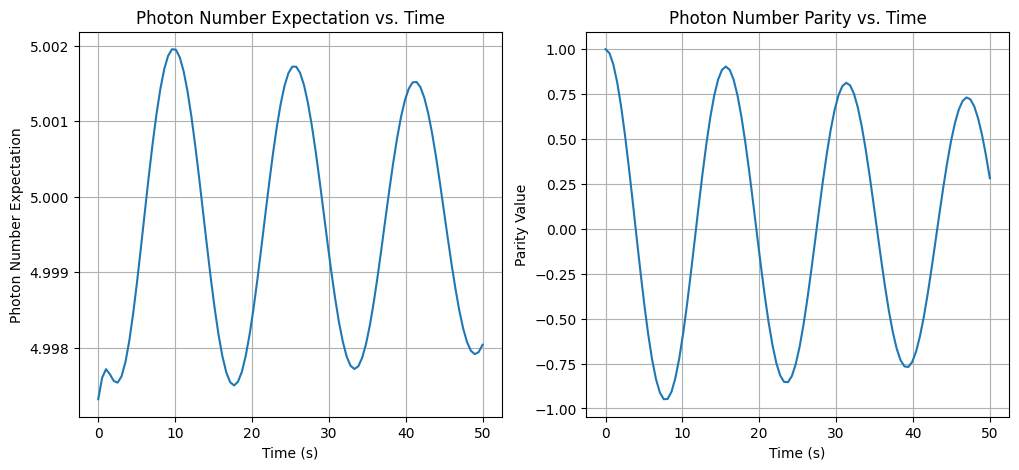

In [56]:
# Plot the photon number parity in the memory mode

# Define parity operator for memory mode
a_op = dq.destroy(n_a)
parity_op = dq.parity(n_a)  
num_op_a = a_op @ a_op.dag()

# Calculate the parity values for each time step
size = len(rho)
parity_val = jnp.zeros(size)
for i in range(size):
    val = dq.expect(parity_op, rho[i])
    parity_val = parity_val.at[i].set(val)
    val = dq.expect(num_op_a, rho[i])
    photon_expect = photon_expect.at[i].set(val)

# plt.figure(figsize=(8, 5))
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(ts, photon_expect)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Photon Number Expectation")
ax[0].set_title("Photon Number Expectation vs. Time")
ax[1].plot(ts, parity_val)
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Parity Value")
ax[1].set_title("Photon Number Parity vs. Time")
ax[0].grid()
ax[1].grid()
plt.show()

Plotting parity expectation value for differenyt Ez values

In [57]:
def get_parity_expectation(rho):
    parity_op = dq.parity(n_a)  
    parity = jnp.zeros(size)
    for i in range(size):
        val = dq.expect(parity_op, rho[i])
        parity = parity.at[i].set(val)
    return parity

In [62]:
## Range of E_z

e_Z = jnp.linspace(-2, -0.05, 6)
parity_data = jnp.zeros((size, len(ts)))
i = 0

for j in e_Z:
    #Define Hamiltonian
    H = g_z * (a.dag() @ a.dag() @ b + a @ a @ b.dag()) + e_d * (b + b.dag())
    H_z = j * (a.dag() + a)

    #Define dissipators
    L = [jnp.sqrt(kappa_b) * b]

    #Time evolution parameters
    ts = jnp.linspace(0, T_z, 100)

    #Solve Master Equation
    res = dq.mesolve((H + H_z), L, psi0, ts)
    rho = dq.ptrace(res.states, 0)
    data = get_parity_expectation(rho)
    parity_data = parity_data.at[i, :].set(data)
    i = i + 1

|██████████| 100.0% ◆ elapsed 6.41s ◆ remaining 0.00ms  
c:\Users\pranv\alice-bob\venv\Lib\site-packages\jax\_src\ops\scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
c:\Users\pranv\alice-bob\venv\Lib\site-packages\jax\_src\ops\scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)
|██████████| 100.0% ◆ elapsed 6.14s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 6.14s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 5.88s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 5.95s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 6.88s ◆ remaining 0.00ms  


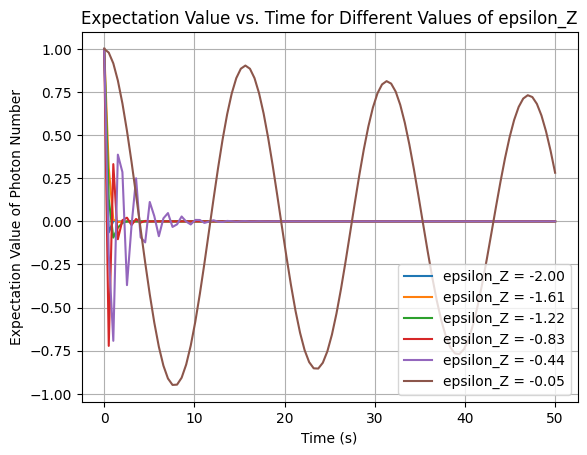

In [66]:
for i, ez in enumerate(e_Z):
    plt.plot(ts, parity_data[i], label=f'epsilon_Z = {ez:.2f}')

plt.xlabel('Time (s)')
plt.ylabel('Expectation Value of Photon Parity')
plt.title('Expectation Value vs. Time for Different Values of epsilon_Z')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

An even tighter bound of Ez

In [72]:
## Tighter bound values of E_z

e_Z = jnp.linspace(-0.1, -0.01, 5)
parity_data = jnp.zeros((size, len(ts)))
i = 0

for j in e_Z:
    #Define Hamiltonian
    H = g_z * (a.dag() @ a.dag() @ b + a @ a @ b.dag()) + e_d * (b + b.dag())
    H_z = j * (a.dag() + a)

    #Define dissipators
    L = [jnp.sqrt(kappa_b) * b]

    #Time evolution parameters
    ts = jnp.linspace(0, T_z, 100)

    #Solve Master Equation
    res = dq.mesolve((H + H_z), L, psi0, ts)
    rho = dq.ptrace(res.states, 0)
    data = get_parity_expectation(rho)
    parity_data = parity_data.at[i, :].set(data)
    i = i + 1

|██████████| 100.0% ◆ elapsed 6.28s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 5.92s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 5.91s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 7.32s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 7.58s ◆ remaining 0.00ms   


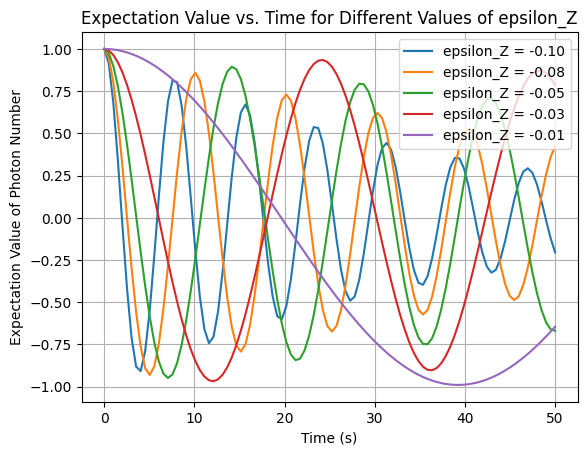

In [73]:
for i, ez in enumerate(e_Z):
    plt.plot(ts, parity_data[i], label=f'epsilon_Z = {ez:.2f}')

plt.xlabel('Time (s)')
plt.ylabel('Expectation Value of Photon Number')
plt.title('Expectation Value vs. Time for Different Values of epsilon_Z')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Part (b)

In [63]:
## Task 1.3 - part (b)

import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

**Testing** for an arbitrary value of kappa_a = 2
Observation - kappa_a is so strong that the state collapses immediately

|██████████| 100.0% ◆ elapsed 9.65s ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:14<00:00,  3.47it/s]


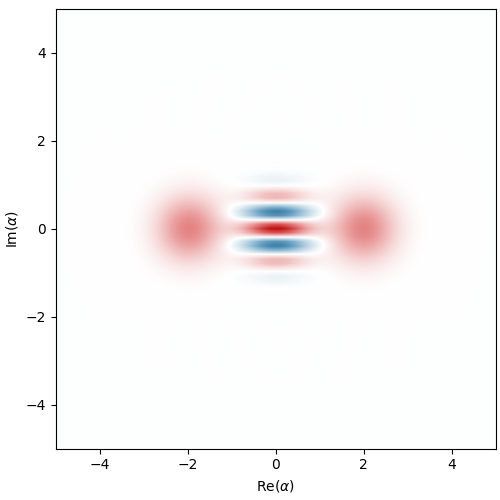

In [68]:
#Define parameters
g_z = 1.0
e_d = -4
kappa_b = 20
e_Z = -0.05
alpha = 2
T_z = 50
kappa_a = 2     # Testing for high kappa_a value

#Define Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

cat_even = dq.unit(dq.coherent(n_a, alpha) + dq.coherent(n_a, -alpha))
cat_odd = dq.unit(dq.coherent(n_a, alpha) - dq.coherent(n_a, -alpha))
a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))

#Define initial state
psi0 = dq.tensor(cat_even, dq.coherent(n_b, 0))

#Define Hamiltonian
H = g_z * (a.dag() @ a.dag() @ b + a @ a @ b.dag()) + e_d * (b + b.dag())
H_z = e_Z * (a.dag() + a)

#Define dissipators
L_b = [jnp.sqrt(kappa_b) * b]
L_a = [jnp.sqrt(kappa_a) * a]
L = L_a + L_b

#Time evolution parameters
ts = jnp.linspace(0, T_z, 100)

#Solve Master Equation
res = dq.mesolve((H + H_z), L, psi0, ts)
rho_new = dq.ptrace(res.states, 0)
#Plot Wigner function animation
dq.plot.wigner_gif(rho_new) # plot Wigner of cat state evolution

Plotting parity vs. time for various values of kappa_a = [0.01, 2] at e_z = [-0.03, -0.05, -0.08, -0.10] -- optimal e_z params chosen from part (a)

In [98]:
## Parity values over range of kappa_a for e_Z = [-0.03, -0.05, -0.08, -0.10]

#Define parameters
g_z = 1.0
e_d = -4
kappa_b = 20
e_Z = -0.03
alpha = 2
T_z = 50
kappa_a = jnp.linspace(0.01, 2, 6)

#Define Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

cat_even = dq.unit(dq.coherent(n_a, alpha) + dq.coherent(n_a, -alpha))
cat_odd = dq.unit(dq.coherent(n_a, alpha) - dq.coherent(n_a, -alpha))
a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))

#Define initial state
psi0 = dq.tensor(cat_even, dq.coherent(n_b, 0))

parity_data = jnp.zeros((size, len(ts)))
i = 0

for j in kappa_a:
    #Define Hamiltonian
    H = g_z * (a.dag() @ a.dag() @ b + a @ a @ b.dag()) + e_d * (b + b.dag())
    H_z = e_Z * (a.dag() + a)

    #Define dissipators
    L_b = [jnp.sqrt(kappa_b) * b]
    L_a = [jnp.sqrt(j) * a]
    L = L_a + L_b

    #Time evolution parameters
    ts = jnp.linspace(0, T_z, 100)

    #Solve Master Equation
    res = dq.mesolve((H + H_z), L, psi0, ts)
    rho = dq.ptrace(res.states, 0)
    data = get_parity_expectation(rho)
    parity_data = parity_data.at[i, :].set(data)
    i = i + 1

|██████████| 100.0% ◆ elapsed 8.39s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 8.27s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 8.58s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 8.86s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 8.95s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 9.33s ◆ remaining 0.00ms   


### plot for ez = -0.03 

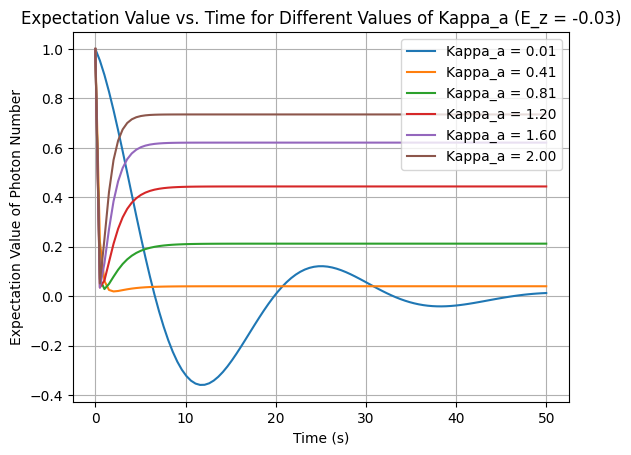

In [99]:
for i, ka in enumerate(kappa_a):
    plt.plot(ts, parity_data[i], label=f'Kappa_a = {ka:.2f}')

plt.xlabel('Time (s)')
plt.ylabel('Expectation Value of Photon Parity')
plt.title('Expectation Value vs. Time for Different Values of Kappa_a (E_z = -0.03)')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

### plot for ez = -0.05

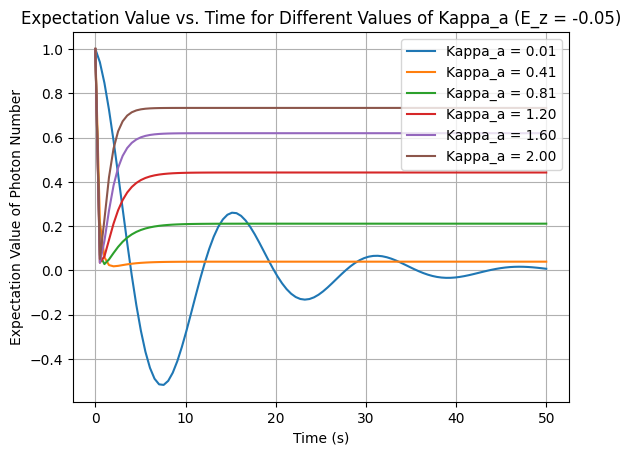

In [97]:
for i, ka in enumerate(kappa_a):
    plt.plot(ts, parity_data[i], label=f'Kappa_a = {ka:.2f}')

plt.xlabel('Time (s)')
plt.ylabel('Expectation Value of Photon Number')
plt.title('Expectation Value vs. Time for Different Values of Kappa_a (E_z = -0.05)')
plt.legend(loc="upper right")
plt.grid(True)

# Show the plot
plt.show()

### plot for ez = -0.08

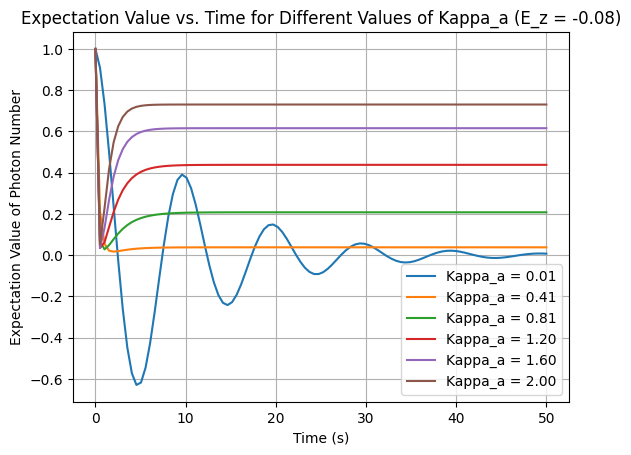

In [91]:
for i, ka in enumerate(kappa_a):
    plt.plot(ts, parity_data[i], label=f'Kappa_a = {ka:.2f}')

plt.xlabel('Time (s)')
plt.ylabel('Expectation Value of Photon Parity')
plt.title('Expectation Value vs. Time for Different Values of Kappa_a (E_z = -0.08)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

### plot for ez = -0.1

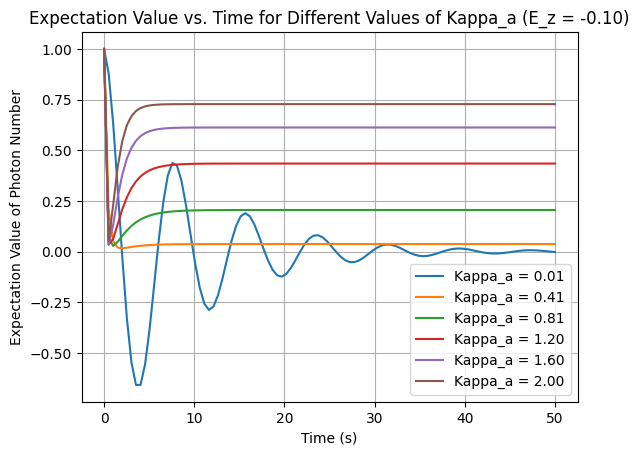

In [94]:
for i, ka in enumerate(kappa_a):
    plt.plot(ts, parity_data[i], label=f'Kappa_a = {ka:.2f}')

plt.xlabel('Time (s)')
plt.ylabel('Expectation Value of Photon Number')
plt.title('Expectation Value vs. Time for Different Values of Kappa_a (E_z = -0.10)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()